In [1]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Read the data

In [53]:
df = pd.read_excel('Two way anova dataset.xlsx')
df.head()

,Department,Experience Level,Productivity Score
0,Sales,Junior,78
1,Marketing,Senior,85
2,IT,Mid-Level,74
3,HR,Junior,65
4,Sales,Senior,90


In [4]:
df1 = df.groupby(["Department","Experience Level"])["Productivity Score"].mean()
df1 = pd.DataFrame(df1)
df1

Productivity Score
Department Experience Level                    
HR         Junior                        64.500
           Mid-Level                     77.500
           Senior                        86.250
IT         Junior                        66.000
           Mid-Level                     70.625
           Senior                        84.875
Marketing  Junior                        68.500
           Mid-Level                     80.250
           Senior                        88.250
Sales      Junior                        80.625
           Mid-Level                     90.375
           Senior                        93.500

In [55]:
## Renaming the column names
df.rename(columns={'Experience Level' : 'Experience_Level',
           'Productivity Score' : 'Productivity_Score'},inplace=True)
df.tail()

,Department,Experience_Level,Productivity_Score
91,HR,Senior,90
92,Sales,Mid-Level,94
93,IT,Senior,89
94,Marketing,Junior,65
95,HR,Mid-Level,81


# Two way Anova

### Finding redisuals

In [66]:
residuals = model3.resid

##  Validating Assumptions

#### Q-Q plot 

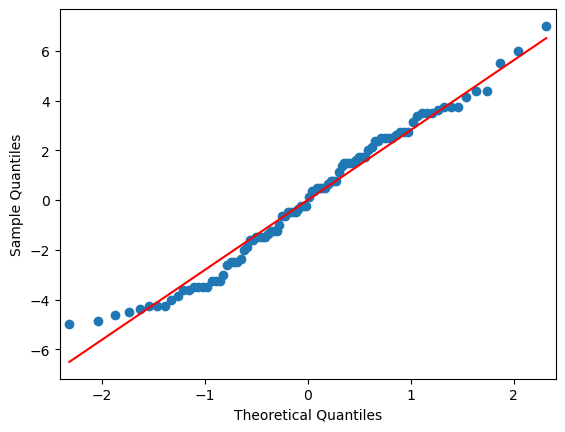

In [68]:
from statsmodels.graphics.gofplots import qqplot
qqplot(residuals, line='s')
plt.show()

#### Shapiro Wilk's Test

In [72]:
shapiro_test = stats.shapiro(residuals)
print(f'Shapiro-Wilk Test p-value: {shapiro_test.pvalue}')

Shapiro-Wilk Test p-value: 0.06416124012466147


#### Levene's Test

In [80]:
from scipy.stats import levene

In [82]:
levene_test1 = stats.levene(df[df['Department'] == 'HR']['Productivity_Score'],
                           df[df['Department'] == 'IT']['Productivity_Score'],
                           df[df['Department'] == 'Marketing']['Productivity_Score'],
                           df[df['Department'] == 'Sales']['Productivity_Score'])

levene_test2 = stats.levene(df[df['Experience_Level'] == 'Junior']['Productivity_Score'],
                           df[df['Experience_Level'] == 'Mid-Level']['Productivity_Score'],
                           df[df['Experience_Level'] == 'Senior']['Productivity_Score'])
#stat, p_value = levene(levene_test1, levene_test2)
print(levene_test1, levene_test2)

LeveneResult(statistic=1.7893221388014318, pvalue=0.15469193820700664) LeveneResult(statistic=4.211741723216121, pvalue=0.017742540650263337)


##### H0 - There is no significant difference in mean of productivity scores between different departments.
##### H1 - There is a significant difference in mean of productivity scores between different departments.

In [9]:
model = ols ('Productivity_Score ~ C(Department)',data=df).fit()
annova_table = sm.stats.anova_lm(model)
annova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(Department),3.0,2854.458333,951.486111,13.416618,2.450747e-07
Residual,92.0,6524.500000,70.918478,NaN,NaN


Factor 2: Experience Level (3 levels: Junior, Mid-Level, Senior)

##### H0 - There is no significant difference in mean productivity scores between different Experience Level.
##### H1 - There is a significant difference in mean productivity scores between different Experience Level.

In [12]:
model1 = ols('Productivity_Score ~ C(Experience_Level)',data=df).fit()
annova_table1 = sm.stats.anova_lm(model1)
annova_table1

,df,sum_sq,mean_sq,F,PR(>F)
C(Experience_Level),2.0,5373.895833,2686.947917,62.392573,6.548520e-18
Residual,93.0,4005.062500,43.065188,NaN,NaN


##### H0 : There is no interaction effect between department and experience level on mean productivity scores.
##### H1: There is an interaction effect between department and experience level on  mean productivity scores.

In [15]:
model2 = ols('Productivity_Score ~ C(Department):C(Experience_Level)',data=df).fit()
annova_table3 = sm.stats.anova_lm(model2)
annova_table3

,df,sum_sq,mean_sq,F,PR(>F)
C(Department):C(Experience_Level),11.0,8619.958333,783.632576,86.726135,4.871680e-41
Residual,84.0,759.000000,9.035714,NaN,NaN


In [62]:
model3 = ols('Productivity_Score ~ Department + Experience_Level+ Department : Experience_Level',data=df).fit()
annova_table4 = sm.stats.anova_lm(model3)
annova_table4

,df,sum_sq,mean_sq,F,PR(>F)
Department,3.0,2854.458333,951.486111,105.302811,2.266994e-28
Experience_Level,2.0,5373.895833,2686.947917,297.369730,7.730363e-39
Department:Experience_Level,6.0,391.604167,65.267361,7.223265,3.090747e-06
Residual,84.0,759.000000,9.035714,NaN,NaN


# Inference

The difference in mean productivity scores between departments depends on the experience level.
There is a significant difference in mean of productivity scores between different departments.
There is a significant difference in mean productivity scores between different Experience Level.
There is an interaction effect between department and experience level on mean productivity scores.

# Post Hoc Tests

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2  meandiff p-adj   lower   upper  reject
----------------------------------------------------------
       HR        IT    -2.25 0.7913 -8.6111  4.1111  False
       HR Marketing   2.9167 0.6286 -3.4444  9.2777  False
       HR     Sales  12.0833    0.0  5.7223 18.4444   True
       IT Marketing   5.1667 0.1528 -1.1944 11.5277  False
       IT     Sales  14.3333    0.0  7.9723 20.6944   True
Marketing     Sales   9.1667 0.0016  2.8056 15.5277   True
----------------------------------------------------------


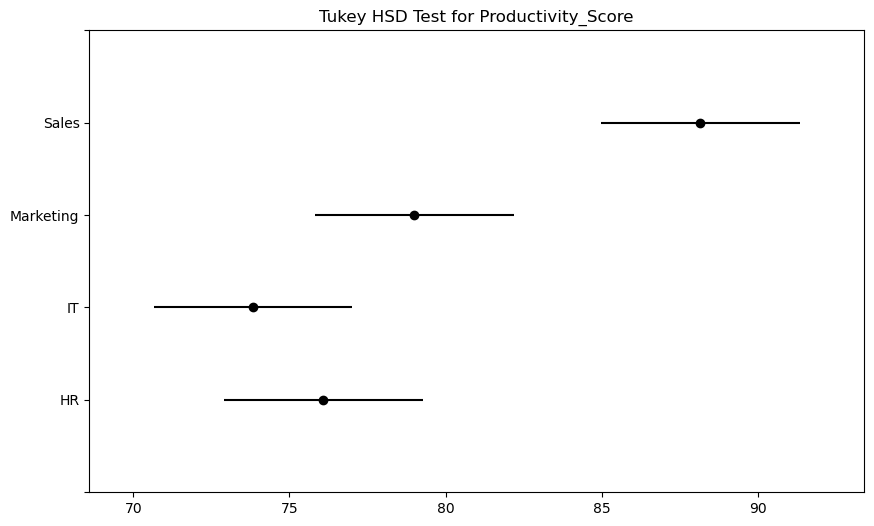

In [46]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Post hoc test for Diet
tukey_diet = pairwise_tukeyhsd(df['Productivity_Score'], df['Department'], alpha=0.05)
print(tukey_diet)
tukey_diet.plot_simultaneous()
plt.title('Tukey HSD Test for Productivity_Score')
plt.show()

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1    group2  meandiff p-adj  lower   upper  reject
---------------------------------------------------------
   Junior Mid-Level   9.7812   0.0  5.8736 13.6889   True
   Junior    Senior  18.3125   0.0 14.4049 22.2201   True
Mid-Level    Senior   8.5312   0.0  4.6236 12.4389   True
---------------------------------------------------------


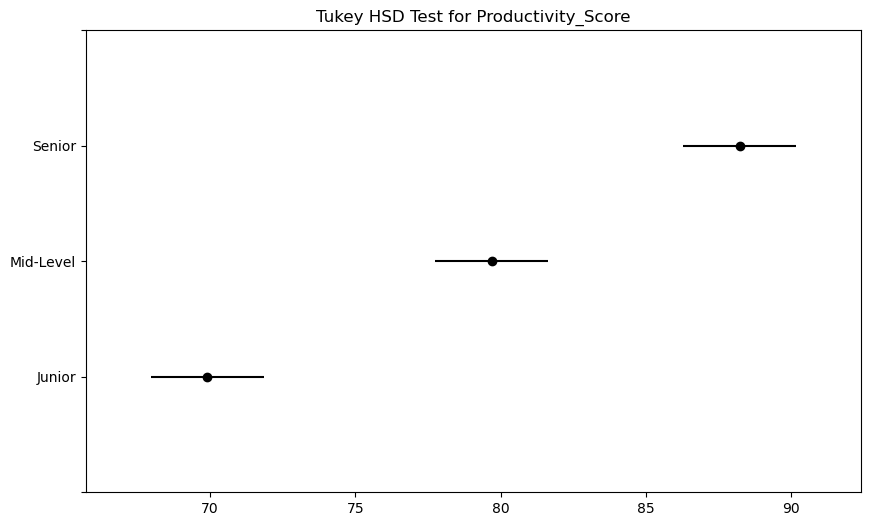

In [48]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Post hoc test for Diet
tukey_diet = pairwise_tukeyhsd(df['Productivity_Score'], df['Experience_Level'], alpha=0.05)
print(tukey_diet)
tukey_diet.plot_simultaneous()
plt.title('Tukey HSD Test for Productivity_Score')
plt.show()

             Multiple Comparison of Means - Tukey HSD, FWER=0.05              
       group1              group2       meandiff p-adj   lower   upper  reject
------------------------------------------------------------------------------
          HR-Junior        HR-Mid-Level     13.0    0.0   7.947  18.053   True
          HR-Junior           HR-Senior    21.75    0.0  16.697  26.803   True
          HR-Junior           IT-Junior      1.5 0.9974  -3.553   6.553  False
          HR-Junior        IT-Mid-Level    6.125 0.0055   1.072  11.178   True
          HR-Junior           IT-Senior   20.375    0.0  15.322  25.428   True
          HR-Junior    Marketing-Junior      4.0  0.264  -1.053   9.053  False
          HR-Junior Marketing-Mid-Level    15.75    0.0  10.697  20.803   True
          HR-Junior    Marketing-Senior    23.75    0.0  18.697  28.803   True
          HR-Junior        Sales-Junior   16.125    0.0  11.072  21.178   True
          HR-Junior     Sales-Mid-Level   25.875    

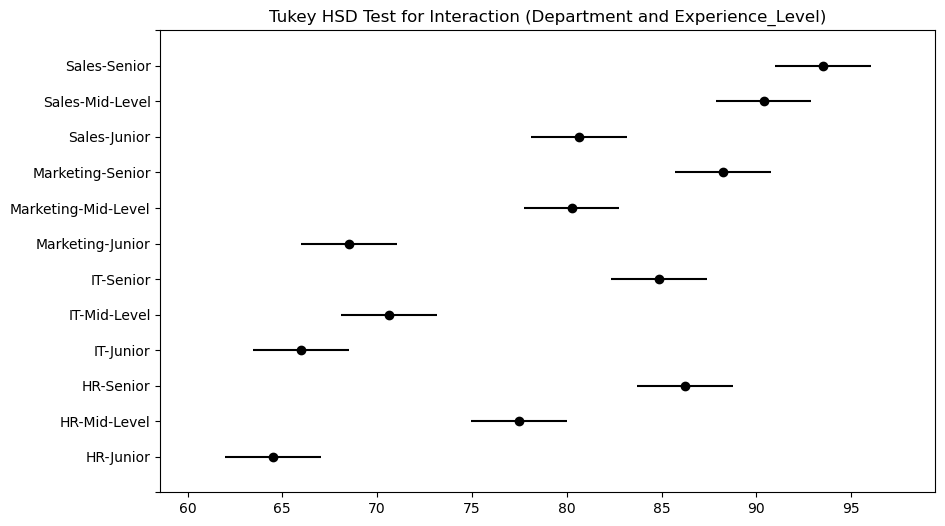

In [50]:
df['Group'] = df['Department'] + '-' + df['Experience_Level']
tukey_interaction = pairwise_tukeyhsd(df['Productivity_Score'], df['Group'], alpha=0.05)
print(tukey_interaction)
tukey_interaction.plot_simultaneous()
plt.title('Tukey HSD Test for Interaction (Department and Experience_Level)')
plt.show()

# INFERENCE AFTER POST HOC TEST